In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import general_funs as gef
import optics_funs as of

In [2]:
T_ITM = 0.014
T_ETM = 5e-6
R_ITM = 1 - T_ITM
R_ETM = 1 - T_ETM

t_ITM = np.sqrt(T_ITM)
t_ETM = np.sqrt(T_ETM)
r_ITM = np.sqrt(R_ITM)
r_ETM = np.sqrt(R_ETM)

RoC_ITM = 1934
RoC_ETM = 2245
len_ARM = 3994.5
TM_aperture_diam = 32.6e-2
TM_aperture_radius = TM_aperture_diam/2

md = of.abcd.space(len_ARM)
m1 = of.abcd.mirror(RoC_ITM)
m2 = of.abcd.mirror(RoC_ETM)

r_rt = r_ITM*r_ETM
m_rt = m1@md@m2@md
q_eig = of.q.eig(m_rt)
g_rt = of.accum_gouy_Siegman_nm(q_eig, m_rt, n=0, m=0)

In [3]:
hiro = np.array([
[0, 50048.802711379496],
[0.005921454338785033, 2395.141892119621],
[0.008609491205724311, 590.9719100115357],
[0.01175492035284398, 116.90838054390841],
[0.014557461148170083, 26.797156585416133],
[0.01684587722692813, 7.474929095967178],
[0.01930469842597146, 2.19027585120506],
[0.021809404320818446, 0.6170567436113384],
[0.023765364166122342, 0.22330419055438952],
[0.026409345075134205, 0.04616280863959566],
[0.028228523639740807, 0.016952810907145274],
[0.030457921359765903, 0.006045896415390788],
[0.03405346939778549, 0.0022660592547119668],
[0.036106955002784366, 0.0014753703528864682],
[0.037763729175314203, 0.0007698714214151001],
[0.0403226322108568, 0.00029999458241849943],
[0.042103531966735906, 0.0001792026689453447],
[0.04431861150043459, 0.0003473780121417512],
[0.04636160264375736, 0.0007822088457025264],
[0.04841030859294335, 0.0008961647126521138],
[0.050459637975496255, 0.0009537612023959073],
[0.05250959079141604, 0.0009429271950630006],
[0.054563492018659523, 0.0005844747440336962],
[0.05662061431829864, 0.0002475433533958371],
[0.05867358039549175, 0.0001713794769270094],
[0.06072581913375684, 0.00012930496765918564],
[0.06277514851630973, 0.0001376153955732274],
[0.06492181662854755, 0.00026938961320440607],
[0.06686798856999115, 0.0003101426405715084],
[0.06892033121381738, 0.0002311438414287857],
[0.07097215432983787, 0.00018318121105550685],
[0.07302325010693031, 0.00015820797769005153],
[0.07511482749064663, 0.00006474117725779131],
[0.07603758364457584, 0.000030785465846210705],
[0.07663209805677704, 0.000012305194045829543],
[0.07762003418633329, 0.0000016963302645513145],
[0.07817842061780489, 0.000004280669152783523],
[0.07886986094477949, 0.000011243625305147221],
[0.08021361884404143, 0.000024221350417217057],
[0.0821566320564261, 0.00004051163054909455],
[0.08430261439196032, 0.00008600192673391013],
[0.08634654068533343, 0.00017338384240802278],
[0.08839483101227484, 0.0002086488242323743],
[0.09044634241161187, 0.000171562036459612],
[0.09249702256645971, 0.0001556362823003146],
[0.09454687147681835, 0.00015577039035820933],
[0.09659838287615538, 0.00012808260716676745],
[0.09865332315901036, 0.0000702137617940831],
[0.099853536295849, 0.00004142015969082195],
]).T

In [4]:
import finesse
from finesse.utilities.maps import circular_aperture
from finesse.knm import Map
finesse.init_plotting()

model = finesse.Model()
model.parse(f"""
l l1 
m m1 Rc={-RoC_ITM} R={R_ITM} T={T_ITM}
m m2 Rc={+RoC_ETM} R={R_ETM} T={T_ETM}
link(l1, m1, {len_ARM}, m2)
cav cavity m2.p1.o
modes(even, maxtem=40)
ccdline I m2.p1.i 300 xlim=0.5 w0_scaled=False
""")
x = y = np.linspace(-TM_aperture_radius, TM_aperture_radius, 100)
smap = Map(
    x, y,
    amplitude=circular_aperture(x, y, TM_aperture_radius, x_offset=0.0, y_offset=0.0),
)
    
model.m1.surface_map = model.m2.surface_map = smap

In [5]:
# print(10)
# model.modes(maxtem=10)
# sol10 = model.run()
# print(30)
# model.modes(maxtem=30)
# sol30 = model.run()
# print(60)
# model.modes(maxtem=60)
# sol60 = model.run()

# sol10x, sol10y = model.I.xdata**2, sol10['I']
# sol30x, sol30y = model.I.xdata**2, sol30['I']
# sol60x, sol60y = model.I.xdata**2, sol60['I']

# gef.save_uncompressed([model.I.xdata**2, sol10['I']], 'sol10.pkl')
# gef.save_uncompressed([model.I.xdata**2, sol30['I']], 'sol30.pkl')
# gef.save_uncompressed([model.I.xdata**2, sol60['I']], 'sol60.pkl')

In [6]:
sol10x, sol10y = gef.load_uncompressed('sol10.pkl')
sol30x, sol30y = gef.load_uncompressed('sol30.pkl')
sol60x, sol60y = gef.load_uncompressed('sol60.pkl')

(1e-07, 11489257.936121795)

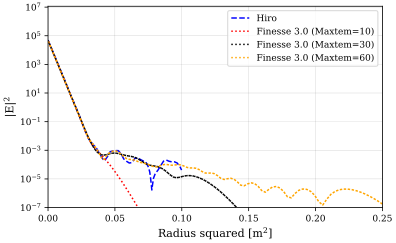

In [12]:
fig, ax = plt.subplots()
plt.semilogy(*hiro, ls='--', label='Hiro')
plt.semilogy(sol10x, sol10y, ls=':', label='Finesse 3.0 (Maxtem=10)')
plt.semilogy(sol30x, sol30y, ls=':', label='Finesse 3.0 (Maxtem=30)')
plt.semilogy(sol60x, sol60y, ls=':', label='Finesse 3.0 (Maxtem=60)')
plt.xlim(0, None)
plt.xlabel("Radius squared [m$^2$]")
plt.ylabel("|E|$^2$")
plt.legend()
plt.ylim(1e-7, None)